In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv(r'C:\Users\Nitro\Desktop\Python\Practical\Employee.csv')

In [3]:
#checking the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


In [4]:
#printing the first 5 rows of the dataset
print(df.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


In [5]:
#printing the shape 
print(df.shape)

(4653, 9)


In [6]:
#checking the datatypes
print(df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [7]:
#checking the missing values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
#standardizing the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  4653 non-null   object
 1   joiningyear                4653 non-null   int64 
 2   city                       4653 non-null   object
 3   paymenttier                4653 non-null   int64 
 4   age                        4653 non-null   int64 
 5   gender                     4653 non-null   object
 6   everbenched                4653 non-null   object
 7   experienceincurrentdomain  4653 non-null   int64 
 8   leaveornot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:\n", df[col].unique())

Unique values in education:
 ['Bachelors' 'Masters' 'PHD']
Unique values in city:
 ['Bangalore' 'Pune' 'New Delhi']
Unique values in gender:
 ['Male' 'Female']
Unique values in everbenched:
 ['No' 'Yes']


In [12]:
# Check for duplicates

print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [14]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

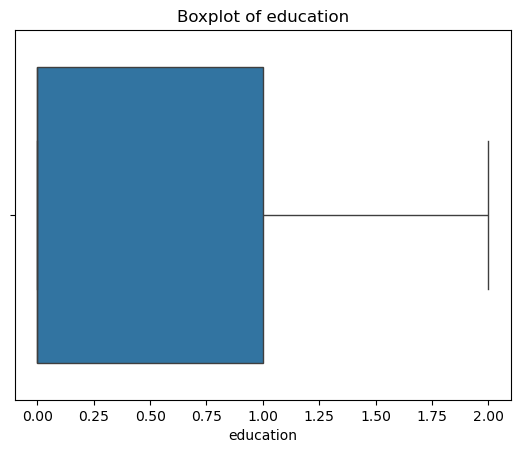

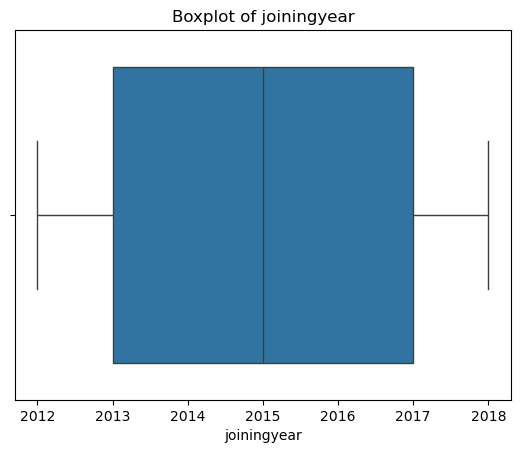

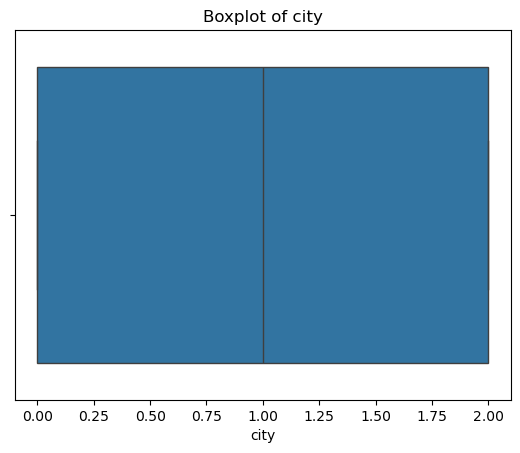

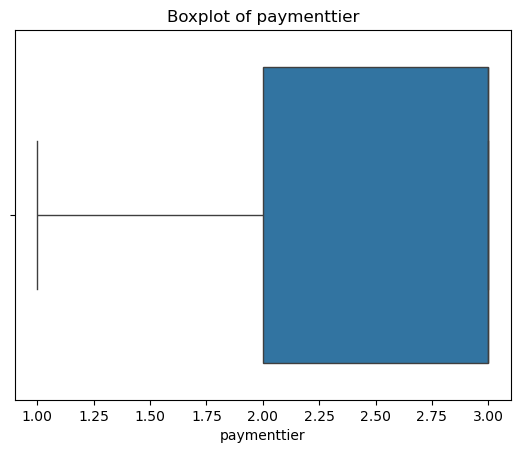

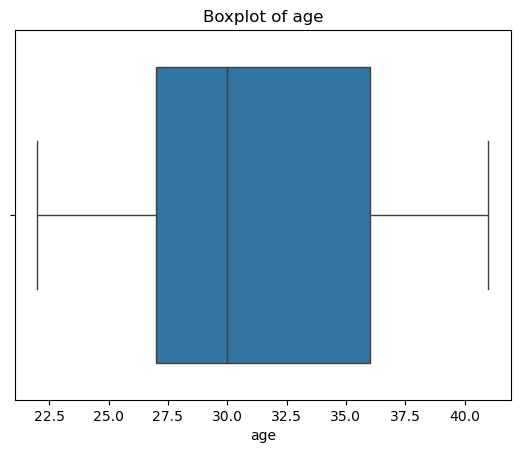

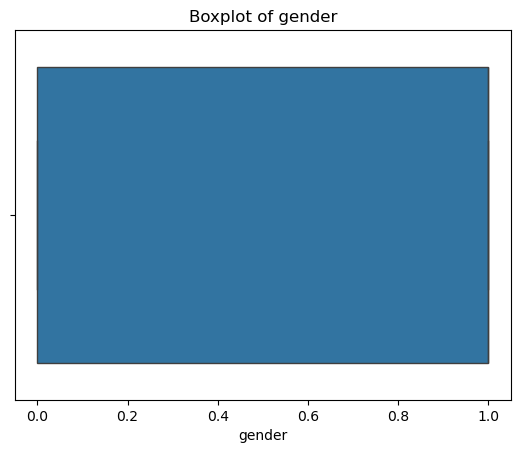

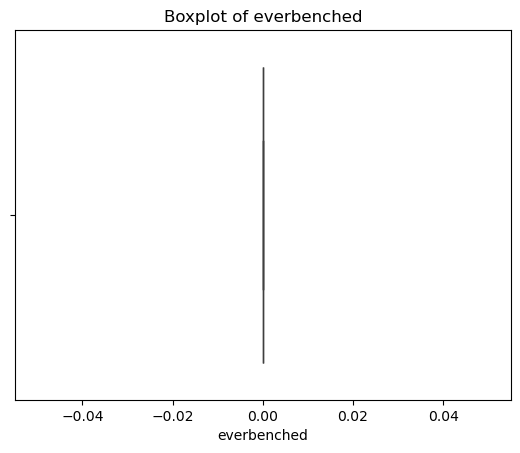

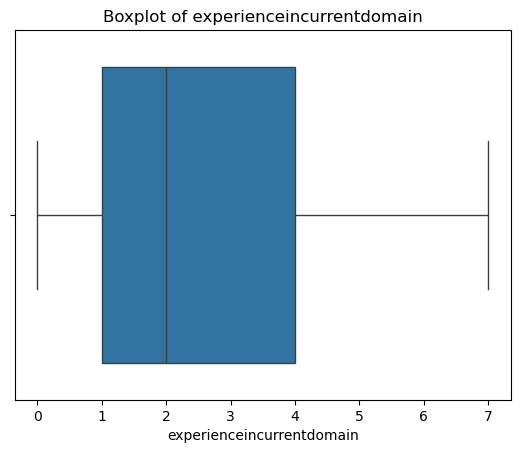

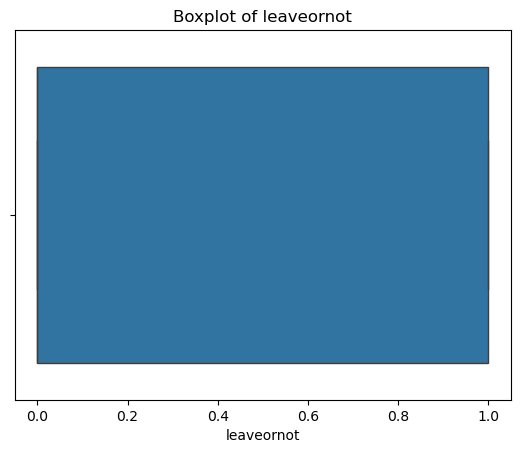

In [ ]:
# Check for outliers using boxplot

# Example: Boxplot to visualize outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Example: Remove outliers using the IQR method
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

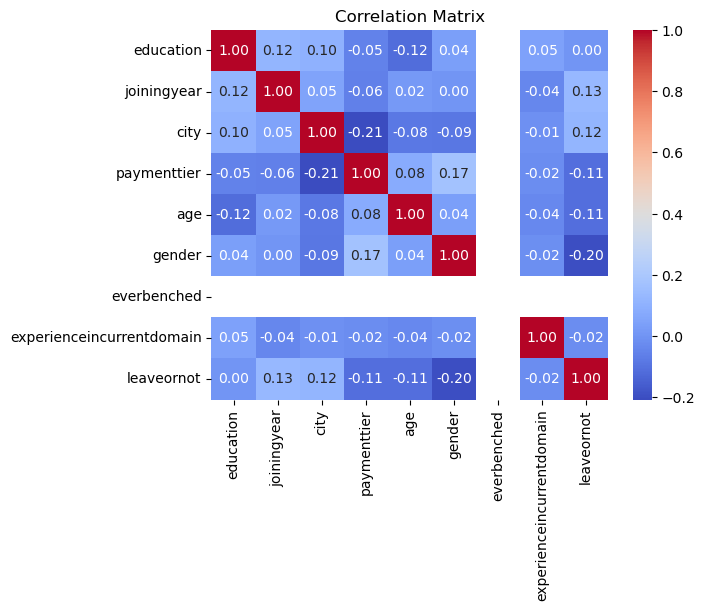

In [20]:
# Check for multicollinearity using a heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [22]:
#VALIDATION AND ASSERTIONS
# -----------------------------------------------
# Replace inf values and drop NaNs

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 0 to 4650
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   education                  2403 non-null   int32
 1   joiningyear                2403 non-null   int64
 2   city                       2403 non-null   int32
 3   paymenttier                2403 non-null   int64
 4   age                        2403 non-null   int64
 5   gender                     2403 non-null   int32
 6   everbenched                2403 non-null   int32
 7   experienceincurrentdomain  2403 non-null   int64
 8   leaveornot                 2403 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 150.2 KB


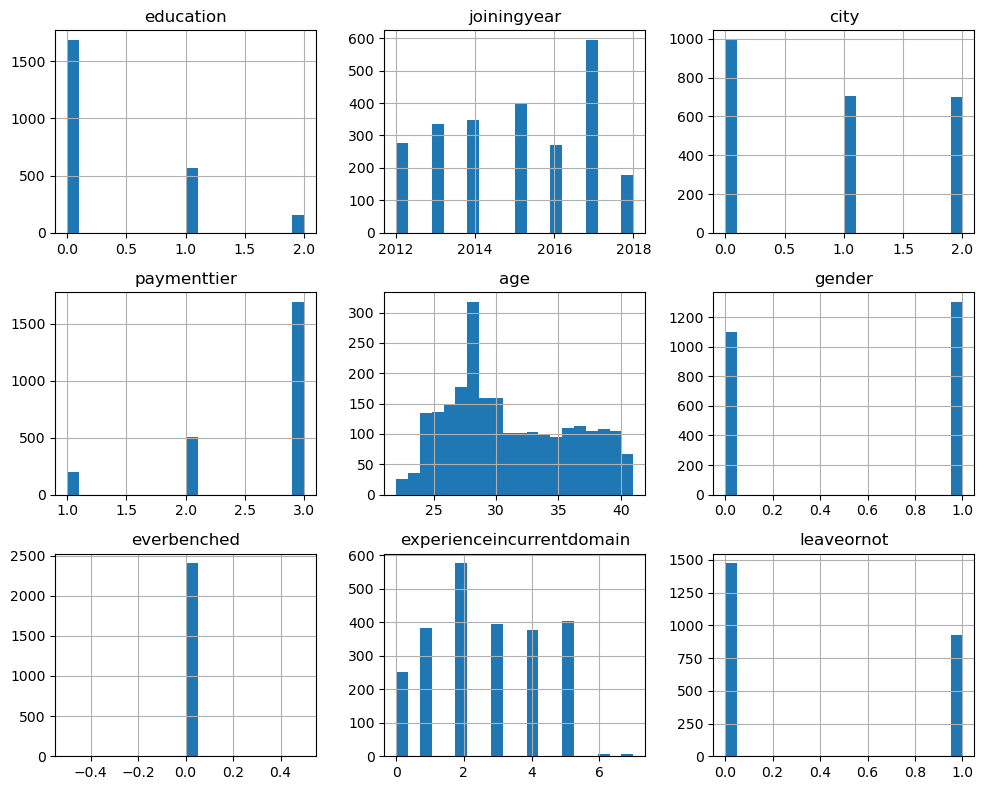

In [24]:
# Histogram
# Histograms for numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

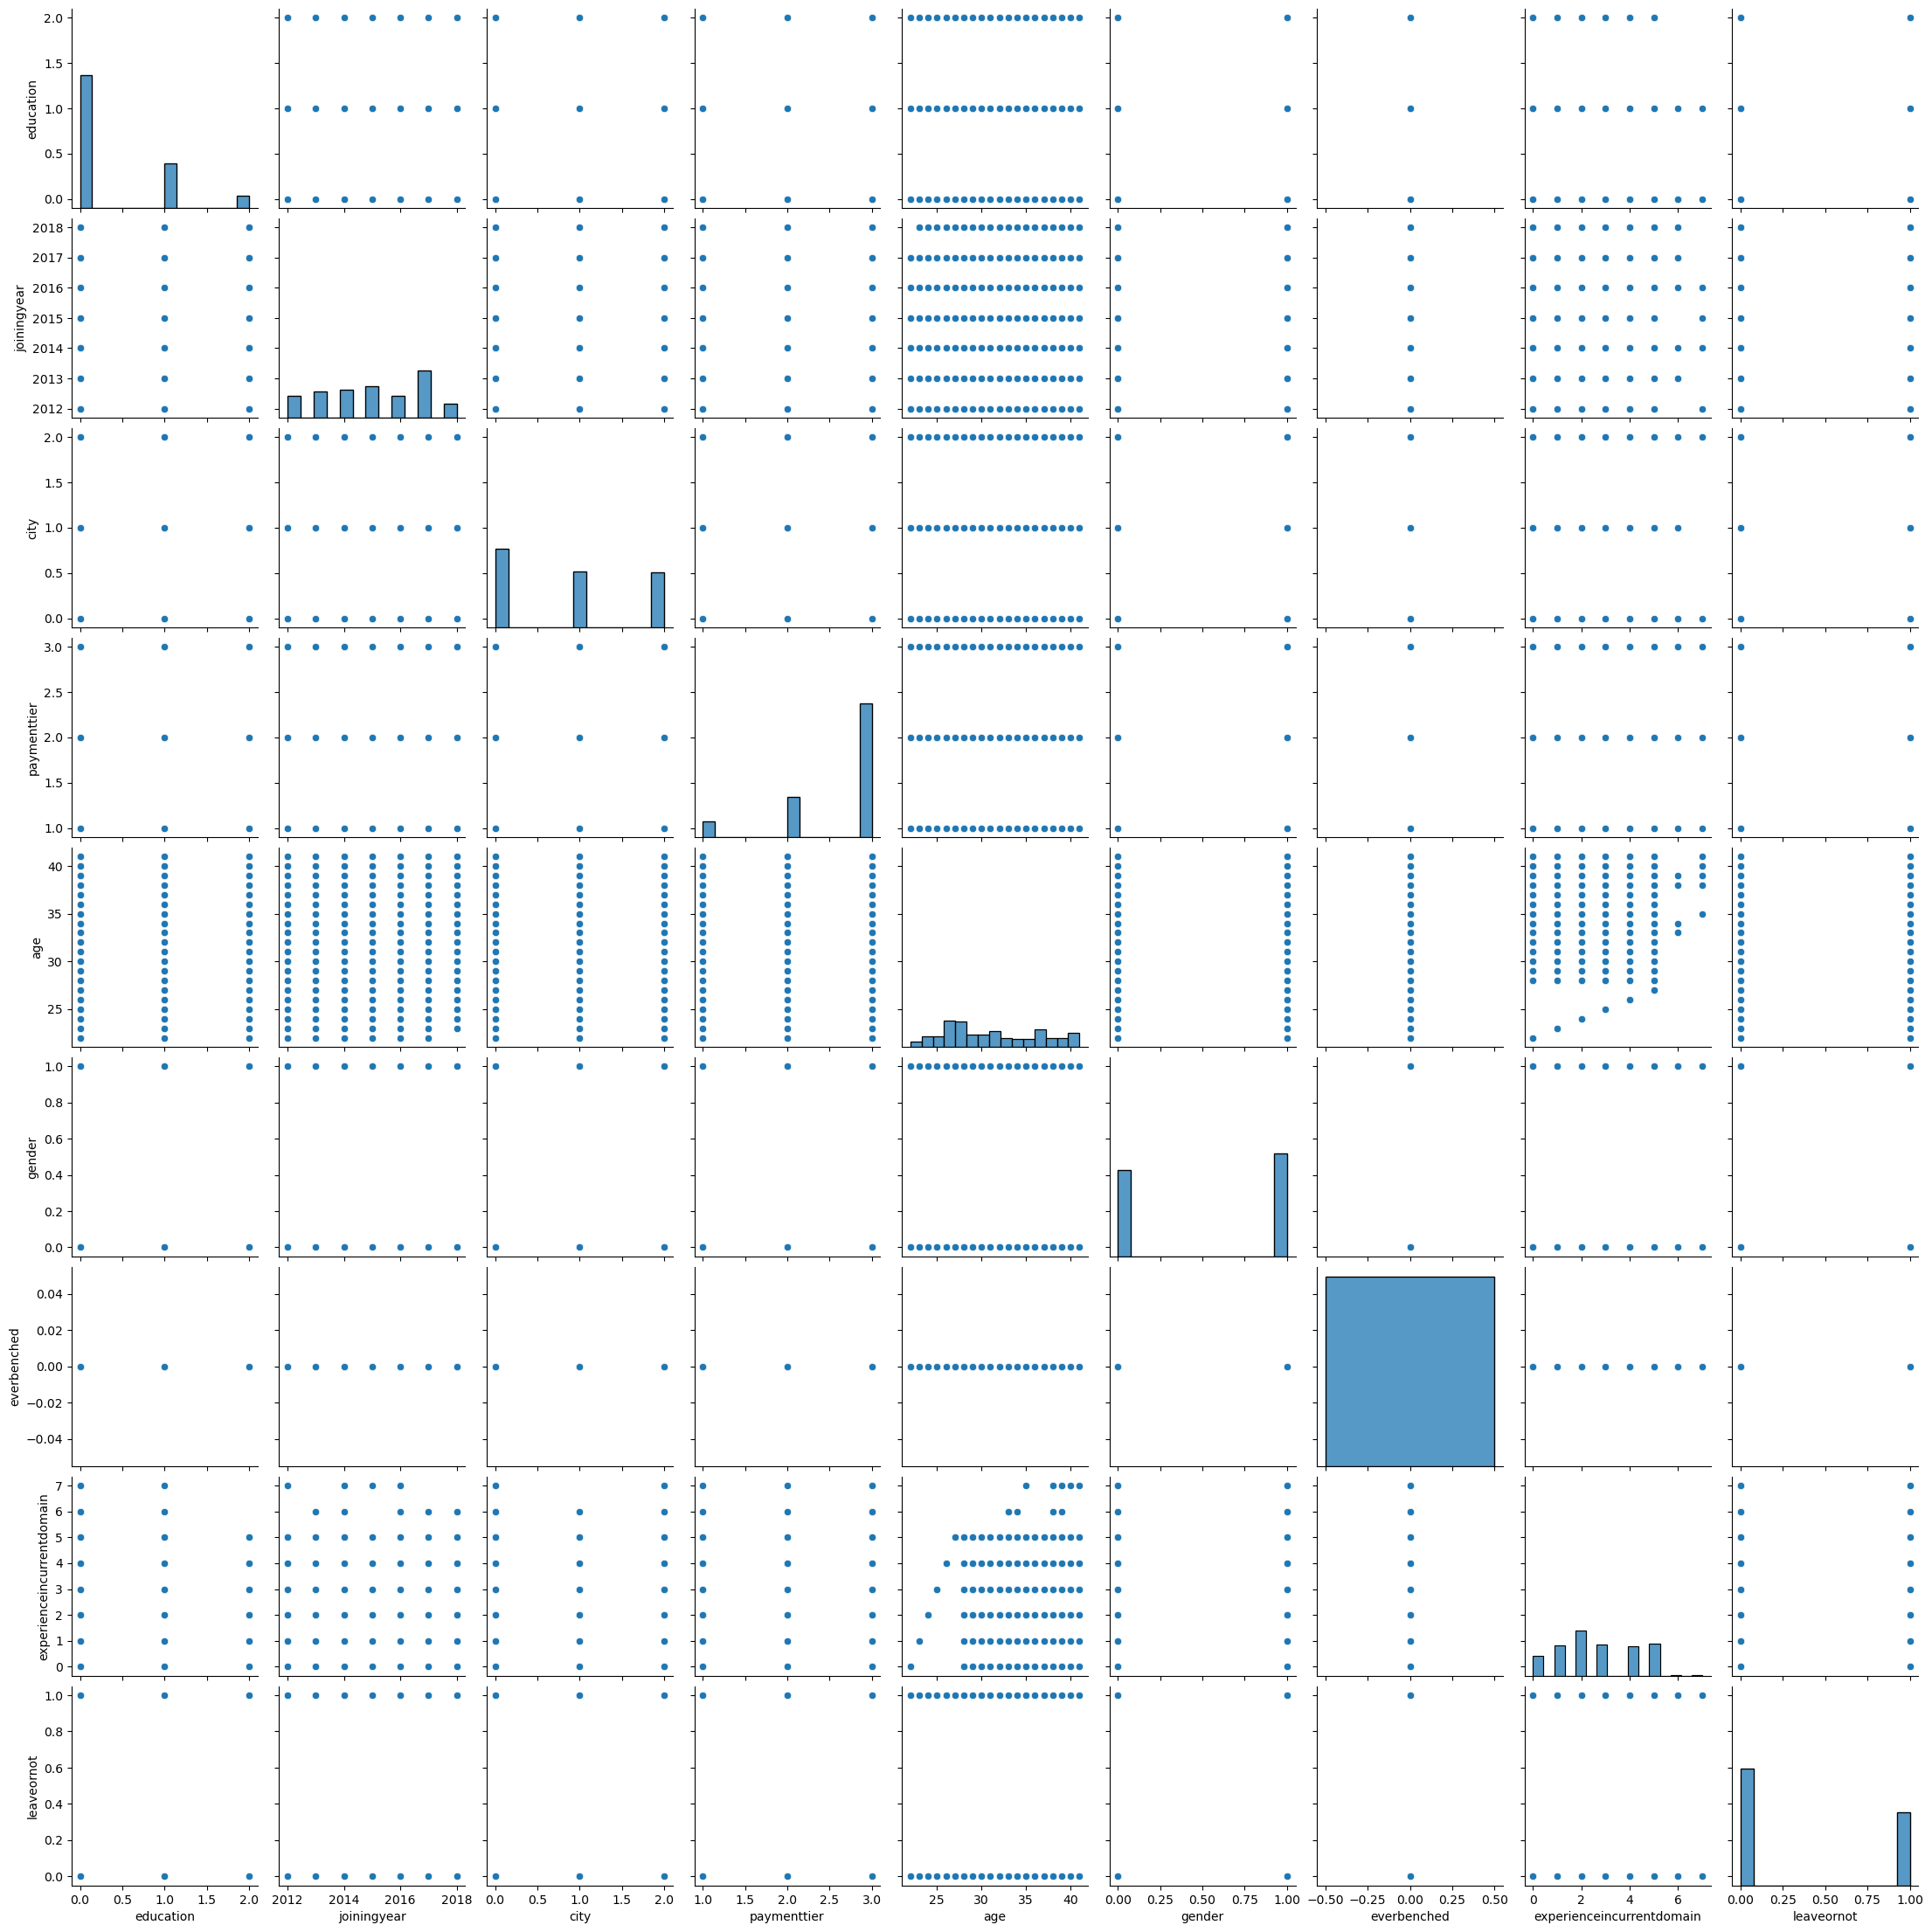

In [25]:
# Pair plot for numerical columns
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

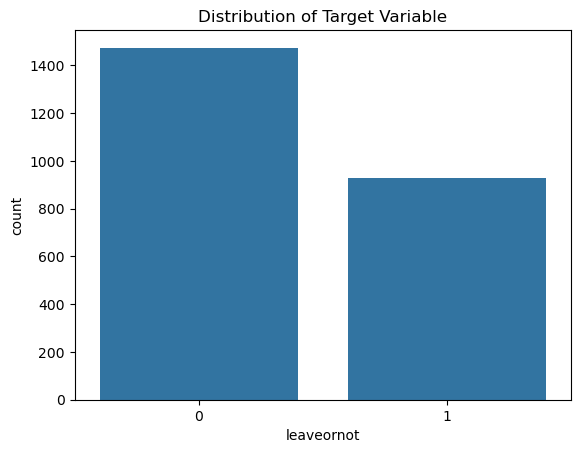

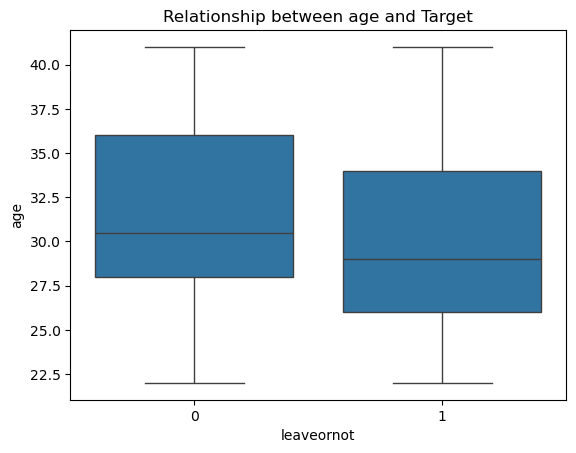

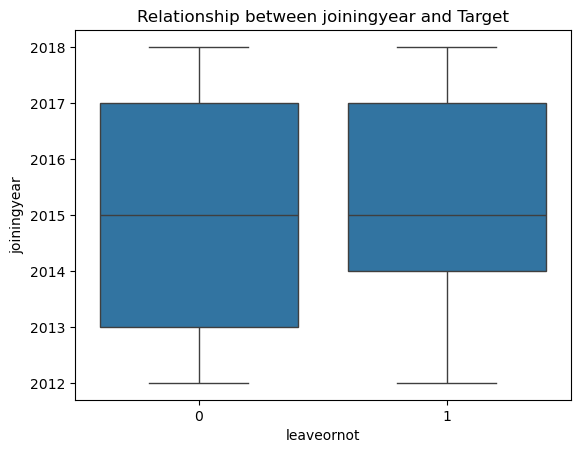

In [26]:
# Distribution of the target variable
sns.countplot(data=df, x='leaveornot')
plt.title('Distribution of Target Variable')
plt.show()

# Relationship between target and other features
for col in ['age', 'joiningyear']:
    sns.boxplot(data=df, x='leaveornot', y=col)
    plt.title(f'Relationship between {col} and Target')
    plt.show()

In [27]:
# Correlation with the target variable
correlation_with_target = df.corr()['leaveornot'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", correlation_with_target)

Correlation with Target Variable:
 leaveornot                   1.000000
joiningyear                  0.130098
city                         0.116491
education                    0.001815
experienceincurrentdomain   -0.021319
paymenttier                 -0.110540
age                         -0.111203
gender                      -0.198163
everbenched                       NaN
Name: leaveornot, dtype: float64


In [28]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Scale numerical columns
scaler = MinMaxScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))

In [29]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

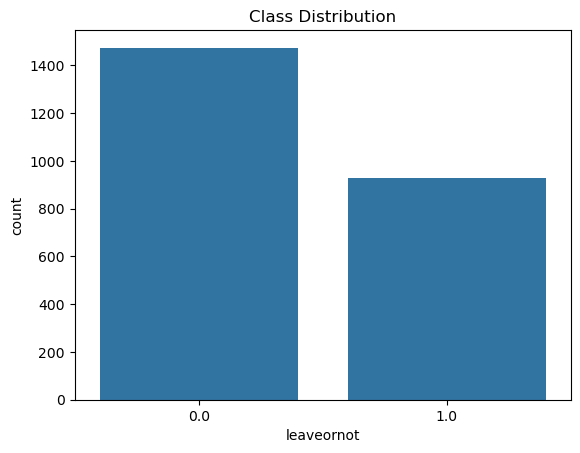

In [30]:
# Check class distribution
sns.countplot(data=df, x='leaveornot')
plt.title('Class Distribution')
plt.show()

In [31]:
# Check skewness of numerical columns
from scipy.stats import skew

for col in df.select_dtypes(include='number').columns:
    print(f"Skewness of {col}: {skew(df[col])}")

Skewness of education: 1.4312277954484367
Skewness of joiningyear: -0.1381599525435176
Skewness of city: 0.23085816612695137
Skewness of paymenttier: -1.4467024464565412
Skewness of age: 0.33727515309183437
Skewness of gender: -0.17292744290239767
Skewness of everbenched: nan
Skewness of experienceincurrentdomain: 0.07081812717349911
Skewness of leaveornot: 0.465736101473852


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 0 to 4650
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   education                  2403 non-null   float64
 1   joiningyear                2403 non-null   float64
 2   city                       2403 non-null   float64
 3   paymenttier                2403 non-null   float64
 4   age                        2403 non-null   float64
 5   gender                     2403 non-null   float64
 6   everbenched                2403 non-null   float64
 7   experienceincurrentdomain  2403 non-null   float64
 8   leaveornot                 2403 non-null   float64
dtypes: float64(9)
memory usage: 187.7 KB


In [47]:
# Compare two columns element-wise
comparison = df['age'] == df['gender']
print("Comparison of column1 and column2:")
print(comparison)

# Count the number of matches and mismatches
matches = comparison.sum()
mismatches = len(comparison) - matches
print(f"Number of matches: {matches}")
print(f"Number of mismatches: {mismatches}")

Comparison of column1 and column2:
0       False
1       False
2       False
3       False
5       False
        ...  
4643    False
4645    False
4647    False
4649    False
4650    False
Length: 2403, dtype: bool
Number of matches: 53
Number of mismatches: 2350


In [48]:
# Statistical comparison of two numerical columns
print("Statistics for column1:")
print(df['age'].describe())

print("\nStatistics for column2:")
print(df['gender'].describe())

Statistics for column1:
count    2403.000000
mean        0.479401
std         0.269789
min         0.000000
25%         0.263158
50%         0.421053
75%         0.736842
max         1.000000
Name: age, dtype: float64

Statistics for column2:
count    2403.000000
mean        0.543071
std         0.498245
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64


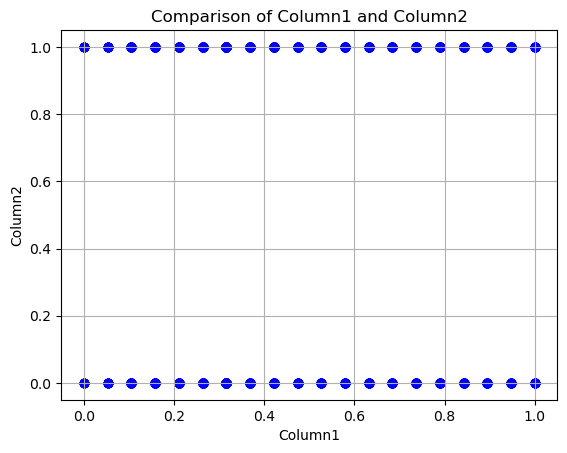

In [49]:
import matplotlib.pyplot as plt

# Scatter plot to compare two columns
plt.scatter(df['age'], df['gender'], alpha=0.7, color='blue')
plt.title('Comparison of Column1 and Column2')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.grid(True)
plt.show()

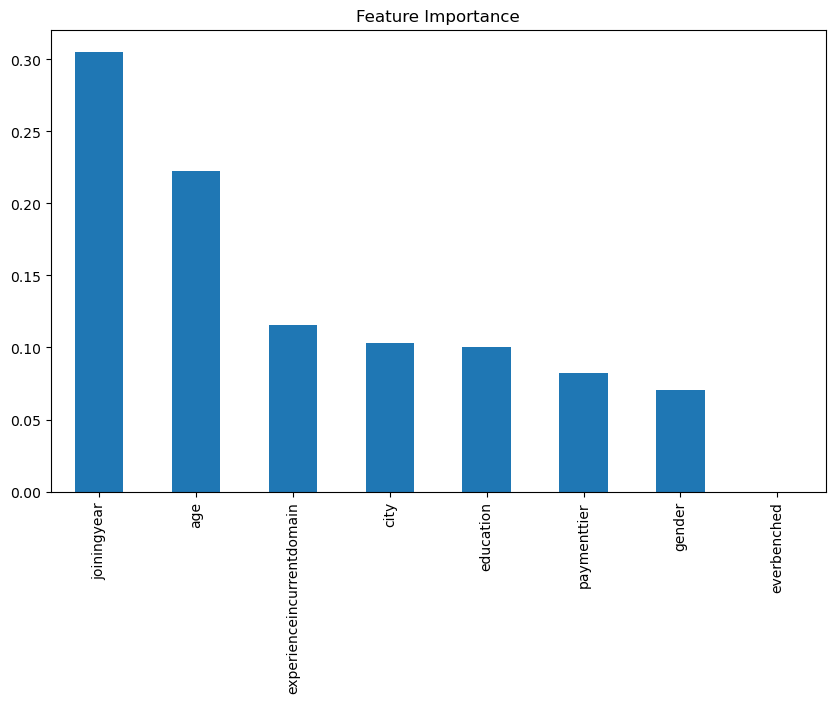

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Example: Feature importance using Random Forest
X = df.drop('leaveornot', axis=1)
y = df['leaveornot']

model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

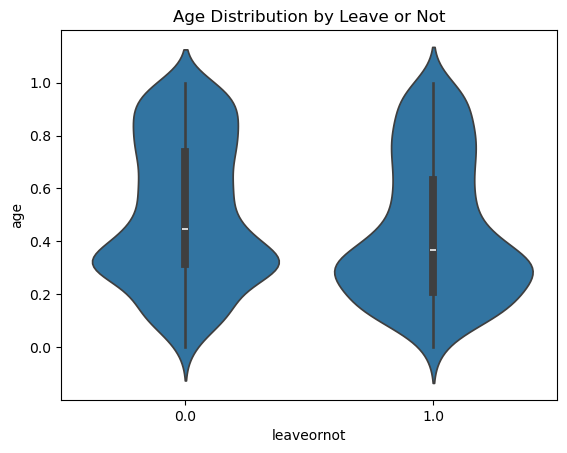

In [33]:
# Violin plot for age distribution by leaveornot
sns.violinplot(data=df, x='leaveornot', y='age')
plt.title('Age Distribution by Leave or Not')
plt.show()

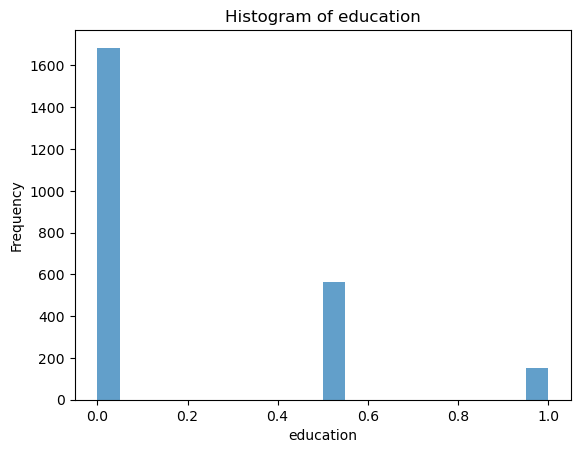

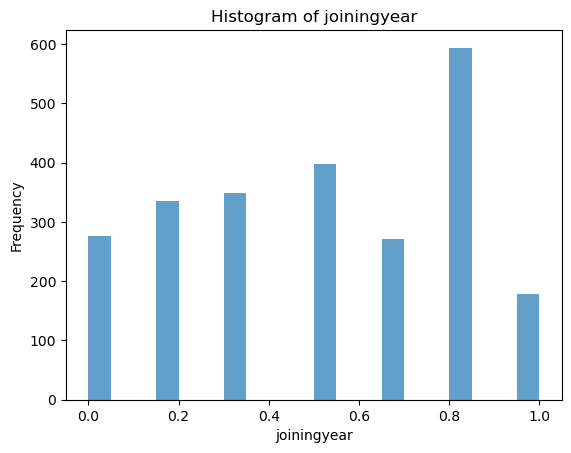

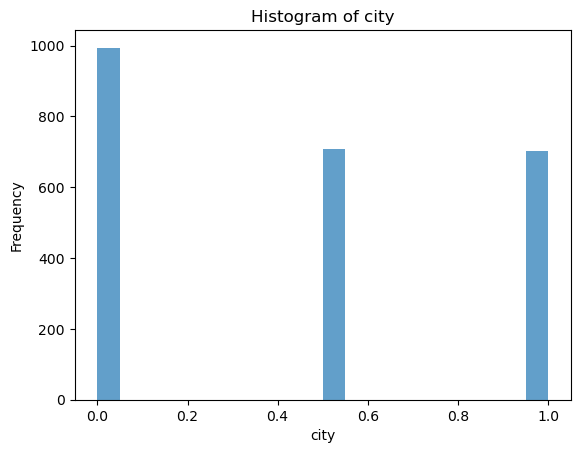

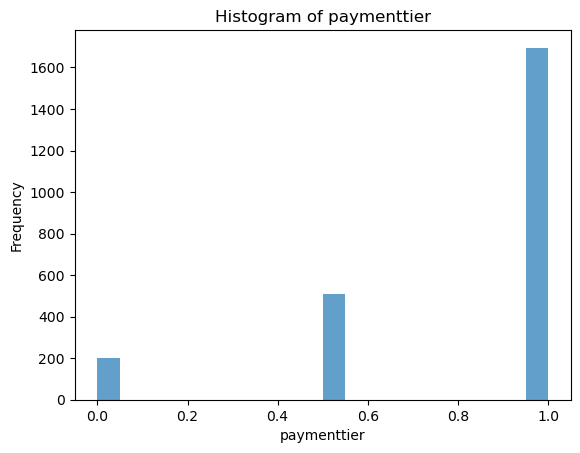

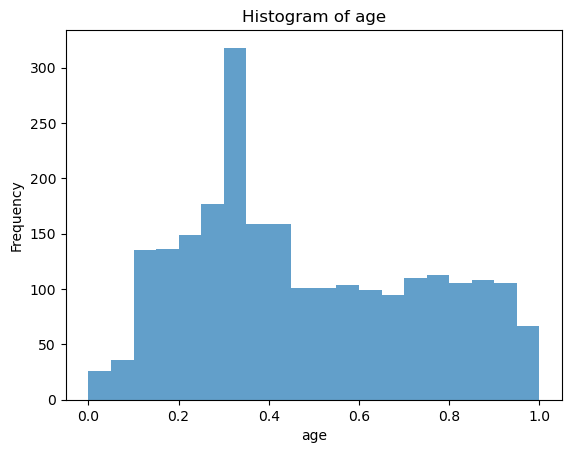

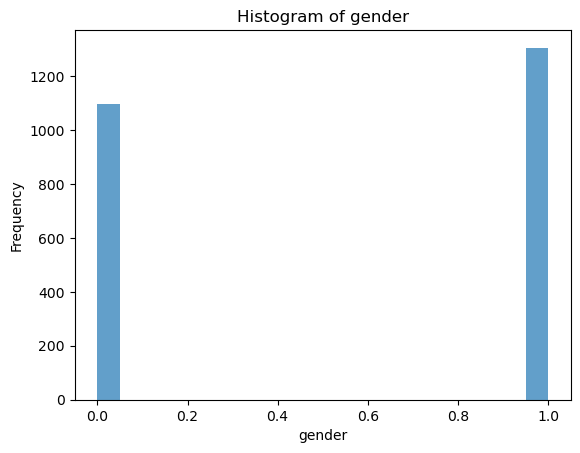

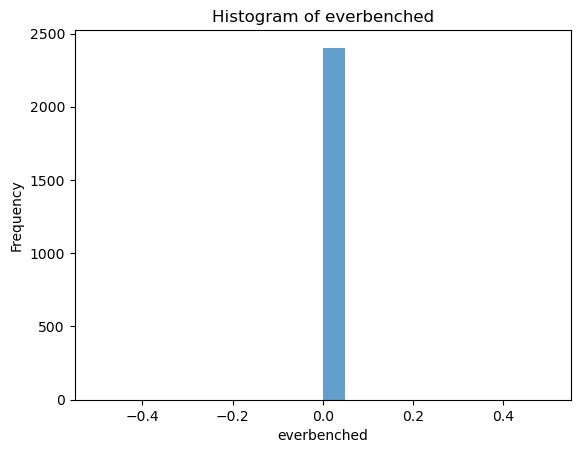

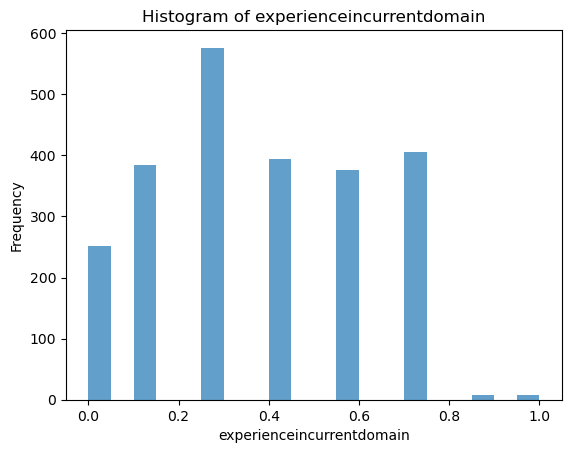

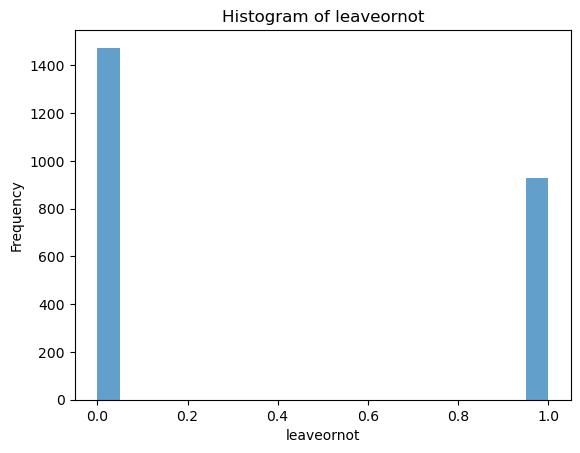

In [34]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.hist(df[col], bins=20, alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2403 entries, 0 to 4650
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   education                  2403 non-null   float64
 1   joiningyear                2403 non-null   float64
 2   city                       2403 non-null   float64
 3   paymenttier                2403 non-null   float64
 4   age                        2403 non-null   float64
 5   gender                     2403 non-null   float64
 6   everbenched                2403 non-null   float64
 7   experienceincurrentdomain  2403 non-null   float64
 8   leaveornot                 2403 non-null   float64
dtypes: float64(9)
memory usage: 187.7 KB


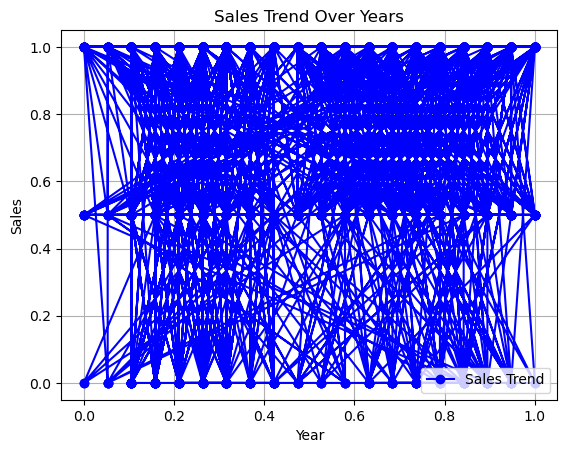

In [38]:
import matplotlib.pyplot as plt

# Example: Line graph for trends over time
# Replace 'year' and 'sales' with your actual column names
x = df['age']  # X-axis (e.g., years)
y = df['paymenttier']  # Y-axis (e.g., sales data)

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Sales Trend')
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Available columns in the dataframe: Index(['education', 'joiningyear', 'city', 'paymenttier', 'age', 'gender',
       'everbenched', 'experienceincurrentdomain', 'leaveornot'],
      dtype='object')


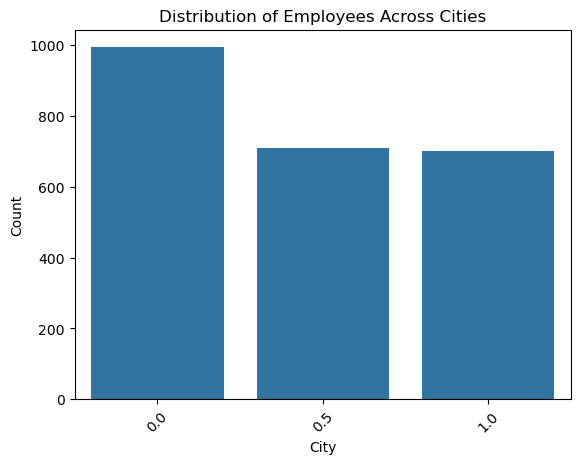

In [40]:
# Verify column names in the dataframe
print("Available columns in the dataframe:", df.columns)

# Replace 'department' with an actual column name from the dataframe
sns.countplot(data=df, x='city')  # Example: Replace 'city' with the desired column
plt.title('Distribution of Employees Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Grouped Statistics by Leave or Not:
                 age  paymenttier
leaveornot                       
0.0         0.503214     0.838874
1.0         0.441618     0.766954


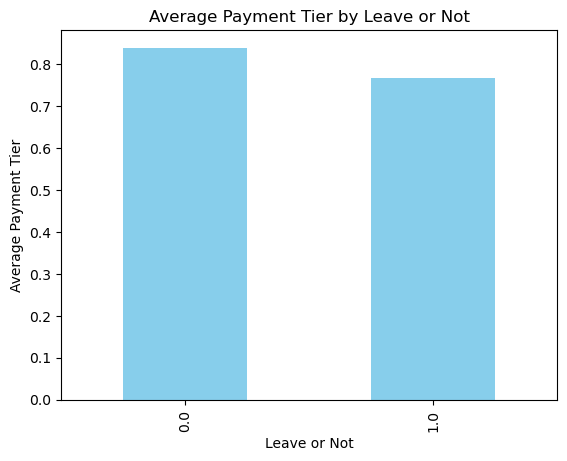

In [42]:
# Grouped statistics for numerical features
print("Grouped Statistics by Leave or Not:")
print(df.groupby('leaveornot')[['age', 'paymenttier']].mean())

# Bar plot for average payment tier by leaveornot
df.groupby('leaveornot')['paymenttier'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Payment Tier by Leave or Not')
plt.xlabel('Leave or Not')
plt.ylabel('Average Payment Tier')
plt.show()

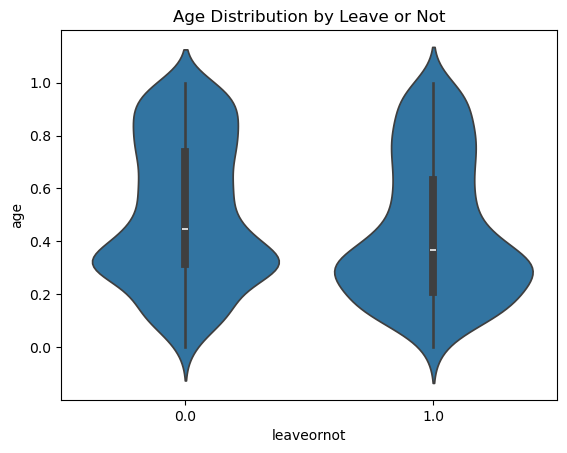

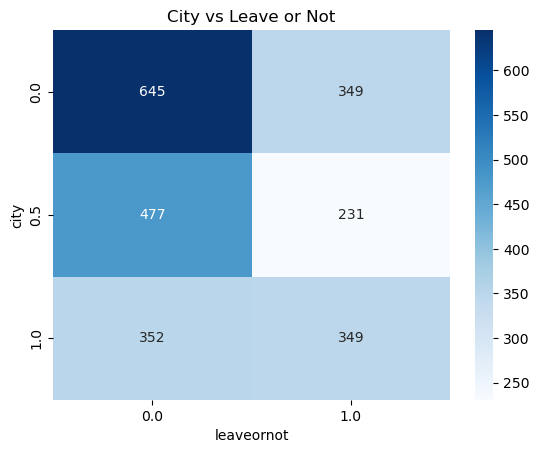

In [44]:
# Violin plot for age distribution by leaveornot
sns.violinplot(data=df, x='leaveornot', y='age')
plt.title('Age Distribution by Leave or Not')
plt.show()

# Heatmap for categorical variables
sns.heatmap(pd.crosstab(df['city'], df['leaveornot']), annot=True, cmap='Blues', fmt='d')
plt.title('City vs Leave or Not')
plt.show()

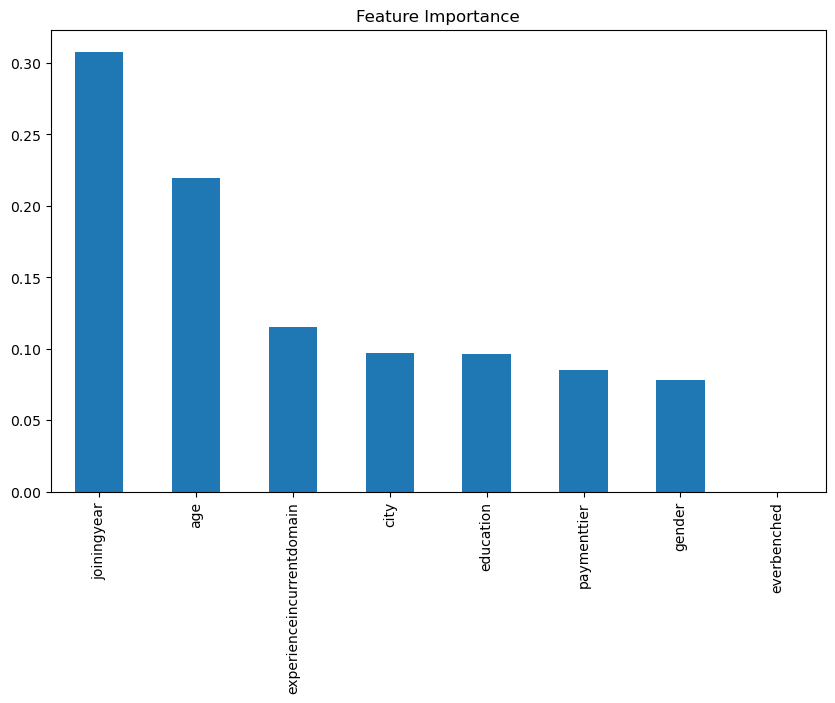

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Feature importance using Random Forest
X = df.drop('leaveornot', axis=1)
y = df['leaveornot']

model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()